# House Price Prediction(Australia) for Surprise Housing(US)

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
- The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1918]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1919]:
#Reading the csv file and creating a dataframe

Housing=pd.read_csv("train.csv")
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding

In [1920]:
#summary of the dataset : 81 columns 1460 Rows

print(Housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1921]:
#count of MSSubclass

Housing.MSSubClass.astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [1922]:
#count of MSZoning

Housing.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1923]:
#count of Street

Housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [1924]:
#count of LotShape

Housing.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

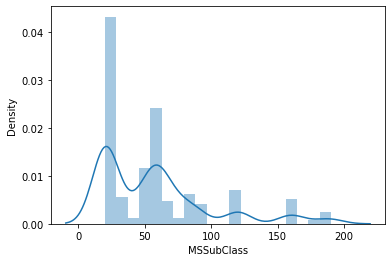

In [1925]:
#count of MSSubClass

sns.distplot(Housing['MSSubClass'])
plt.show()

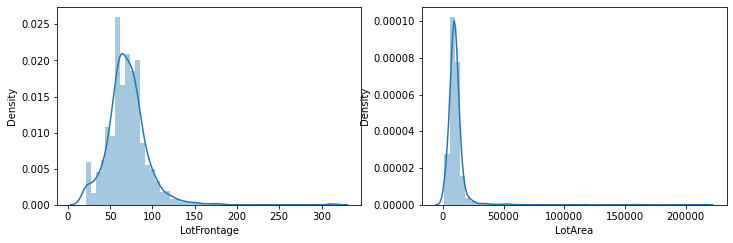

In [1926]:
#Distribution of LotFrontage and LotArea

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(Housing['LotFrontage'])
plt.subplot(222)
sns.distplot(Housing['LotArea'])
plt.show()

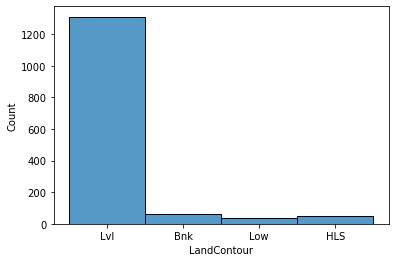

In [1927]:
#Distribution of LandContour

sns.histplot(Housing['LandContour'])
plt.show()

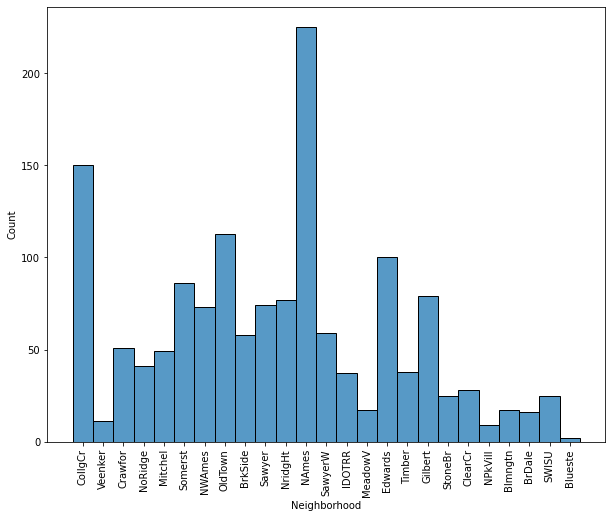

In [1928]:
#Distribution of Neighborhood

plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.histplot(Housing['Neighborhood'])
plt.show()

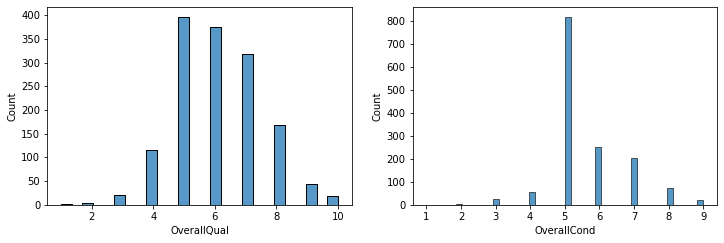

In [1929]:
#Distribution of OverallQual and OverallCond

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.histplot(Housing['OverallQual'])
plt.subplot(222)
sns.histplot(Housing['OverallCond'])
plt.show()

## Data Exploration

In [1930]:
# all numeric (float and int) variables in the dataset

Housing_numeric = Housing.select_dtypes(include=['float64', 'int64'])
Housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [1931]:
Housing_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1932]:
#dropping numeric variables which have dtype int/float but are categorical and Id

Housing_numeric=Housing_numeric.drop(columns=['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold'],axis=1)

In [1933]:
#converting dtype of categorical variables from int to object

int_to_object=['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold', 'YrSold']
Housing[int_to_object] = Housing[int_to_object].astype('object')

In [1934]:
# correlation matrix
cor = Housing_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


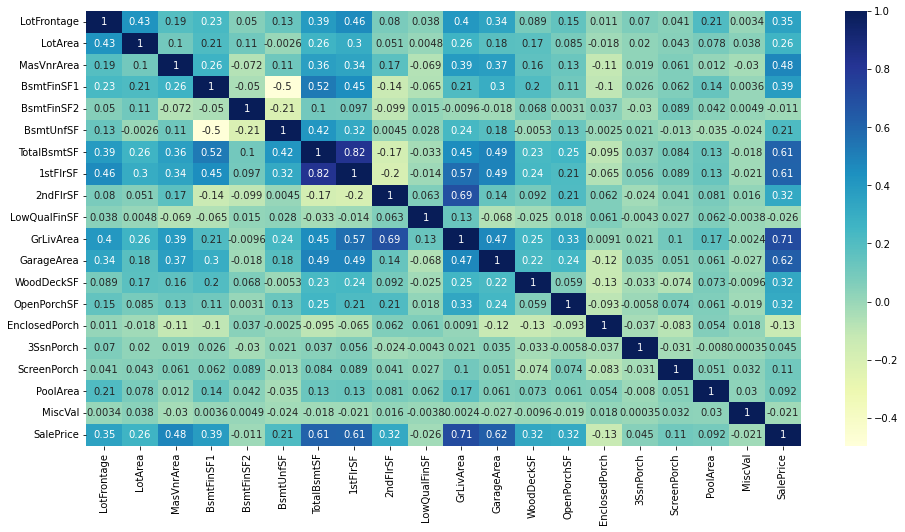

In [1935]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Insights:

Correlation of SalePrice with independent Variables:
- SalePrice is Highly(positively) correlated with MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea.
- SalePrice is negatively correlated with EnclosedPorch

Correlation among independent variables:
- LotFrontage with 1stFlrSF and LotArea,
- BsmtFinSF1 with (positively) 1stFlrSF and TotalBsmtSF and (negatively) BsmtUnfSF,
- BsmtUnfSF with TotalBsmtSF,
- TotalBsmtSF with GarageArea, GrLivArea and 1stFlrSF,
- 1stFlrSF with GarageArea and GrLivArea,
- 2nd FlrSf with GrLivArea,
- GrLivArea with GarageArea

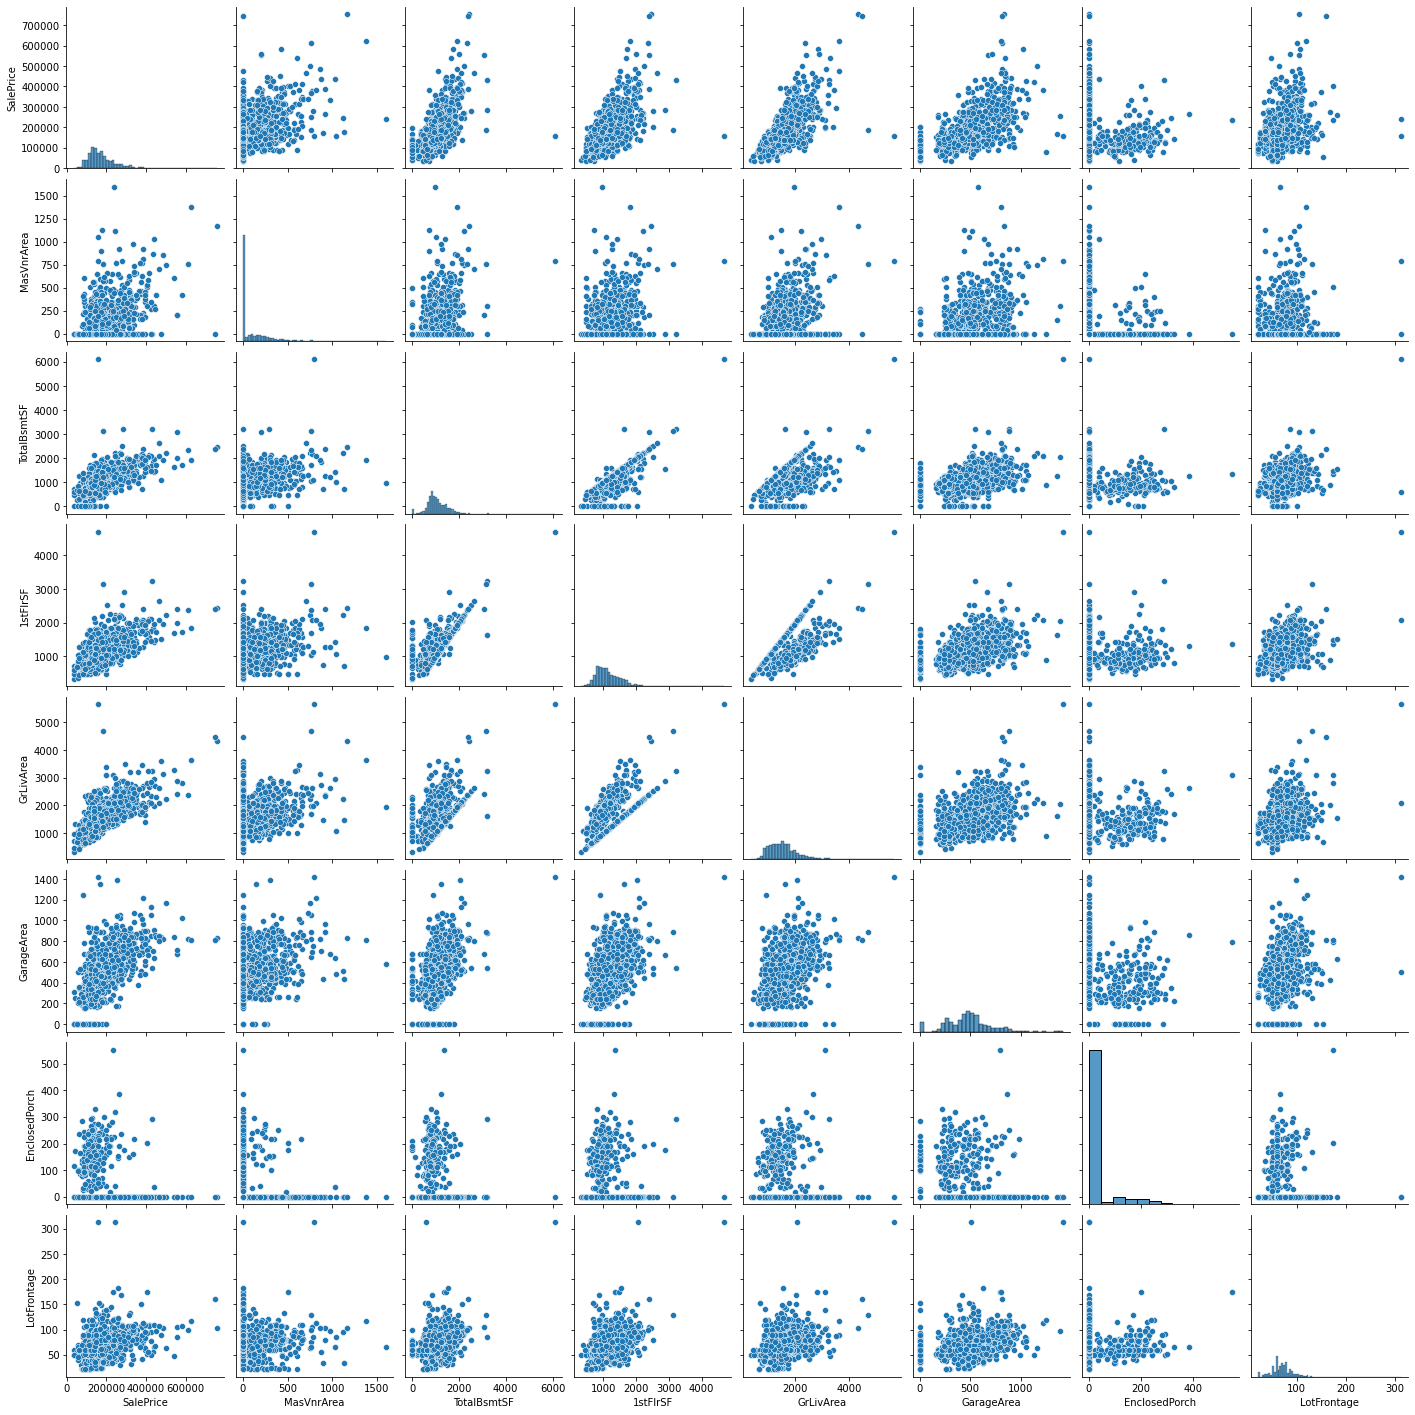

In [1936]:
#pairplot

sns.pairplot(Housing[['SalePrice','MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea','EnclosedPorch','LotFrontage']])
plt.show()

#### Outlier Analysis

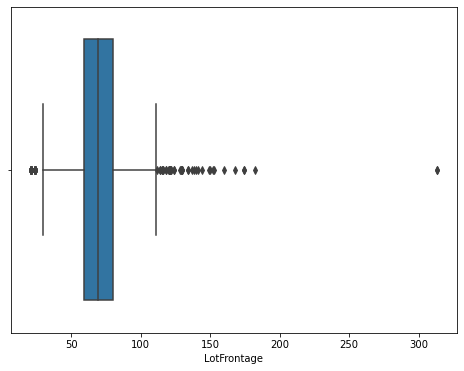

In [1937]:
#LotFrontage

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.LotFrontage)
plt.show()

In [1938]:
#Removing outlier 

Housing=Housing[~(Housing['LotFrontage']>300)]

In [1939]:
Housing.shape

(1458, 81)

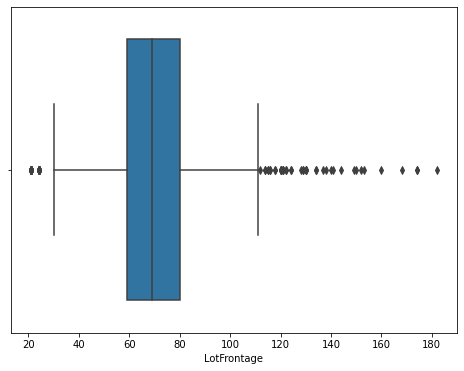

In [1940]:
#LotFrontage

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.LotFrontage)
plt.show()

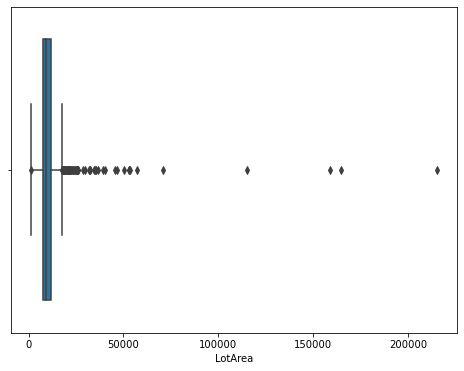

In [1941]:
#LotArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.LotArea)
plt.show()

In [1942]:
#LotArea Statistical Summary

Housing.LotArea.describe()

count      1458.000000
mean      10468.471879
std        9879.455077
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

In [1943]:
#Removing outlier using interquartile range

Q1,Q3=Housing['LotArea'].quantile([0.10,0.9])
iqr=Q3-Q1
Housing=Housing[(Housing['LotArea']>Q1-1.5*iqr) & (Housing['LotArea']<Q3+1.5*iqr)]

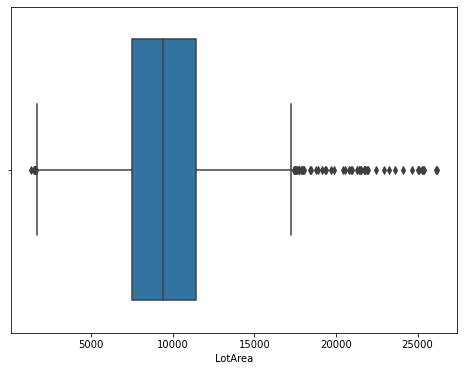

In [1944]:
#LotArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.LotArea)
plt.show()

In [1945]:
#checking LotArea summary again

Housing.LotArea.describe()

count     1435.000000
mean      9618.062718
std       3794.904801
min       1300.000000
25%       7500.000000
50%       9382.000000
75%      11424.000000
max      26178.000000
Name: LotArea, dtype: float64

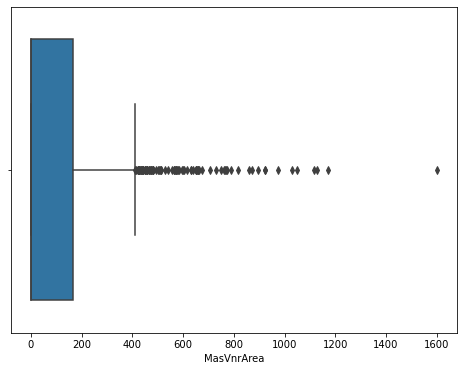

In [1946]:
#MasVnrArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.MasVnrArea)
plt.show()

In [1947]:
#Removing outlier

Housing=Housing[~(Housing.MasVnrArea>1250)]

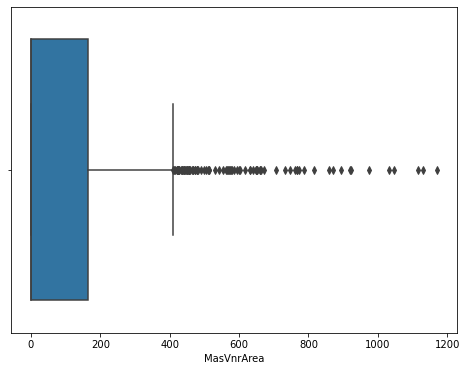

In [1948]:
#MasVnrArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.MasVnrArea)
plt.show()

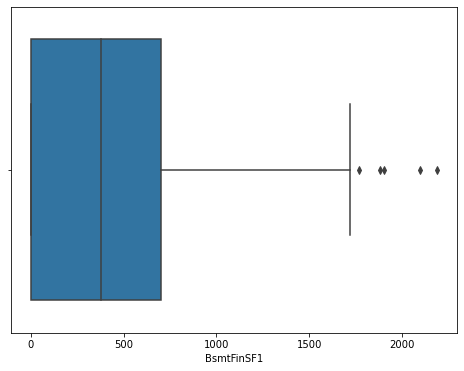

In [1949]:
#BsmtFinSF1

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.BsmtFinSF1)
plt.show()

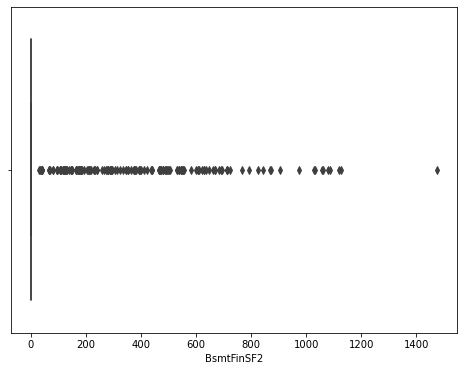

In [1950]:
#BsmtFinSF2

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.BsmtFinSF2)
plt.show()

In [1951]:
#Removing outlier

Housing=Housing[~(Housing.BsmtFinSF2>1250)]

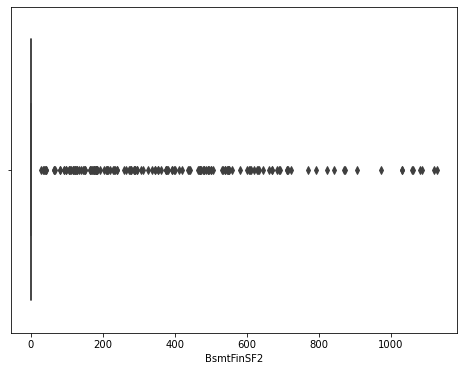

In [1952]:
#BsmtFinSF2

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.BsmtFinSF2)
plt.show()

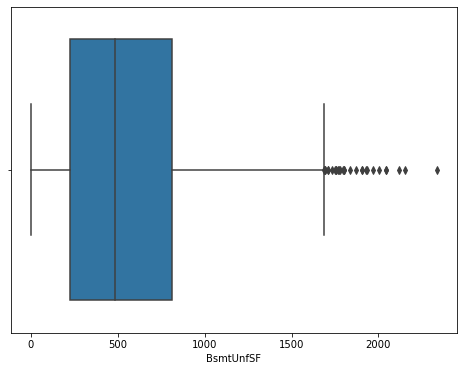

In [1953]:
#BsmtUnfSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.BsmtUnfSF)
plt.show()

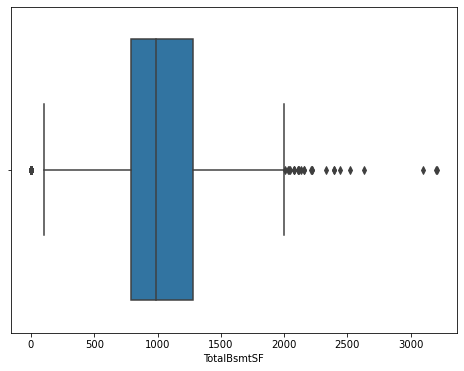

In [1954]:
#TotalBsmtSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing.TotalBsmtSF)
plt.show()

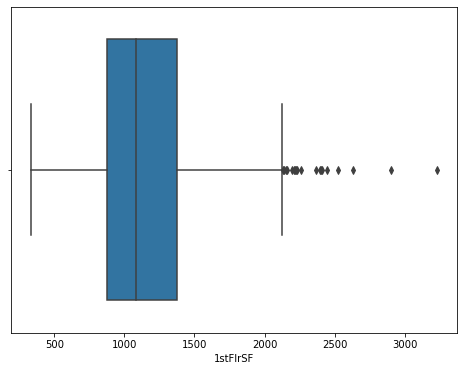

In [1955]:
#1stFlrSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['1stFlrSF'])
plt.show()

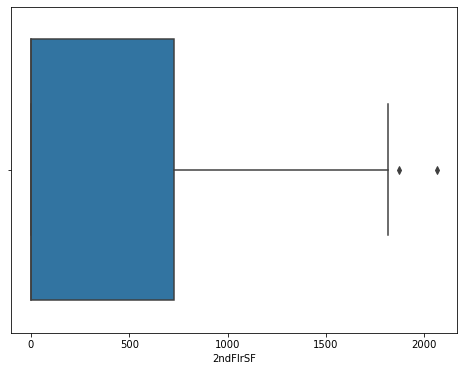

In [1956]:
#2ndFlrSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['2ndFlrSF'])
plt.show()

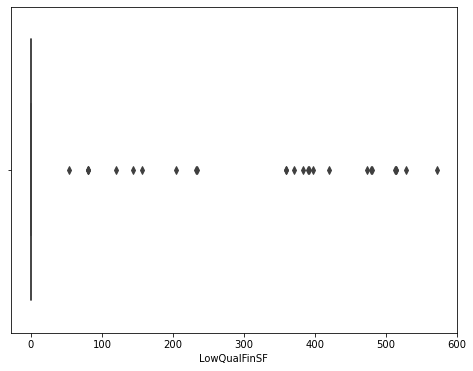

In [1957]:
#LowQualFinSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['LowQualFinSF'])
plt.show()

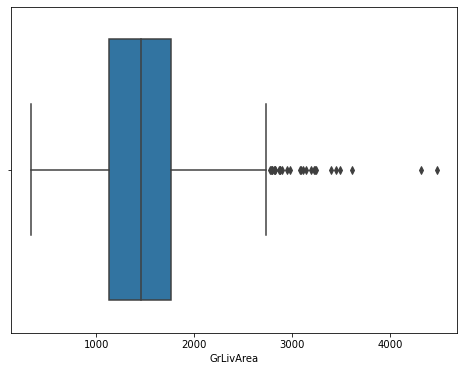

In [1958]:
#GrLivArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['GrLivArea'])
plt.show()

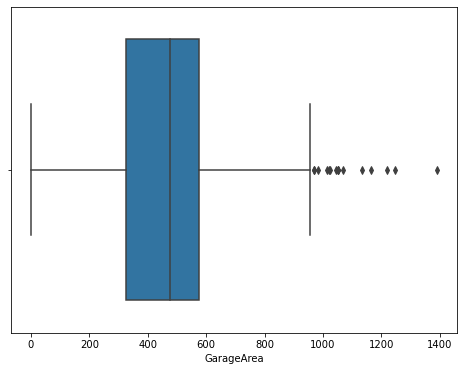

In [1959]:
#GarageArea

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['GarageArea'])
plt.show()

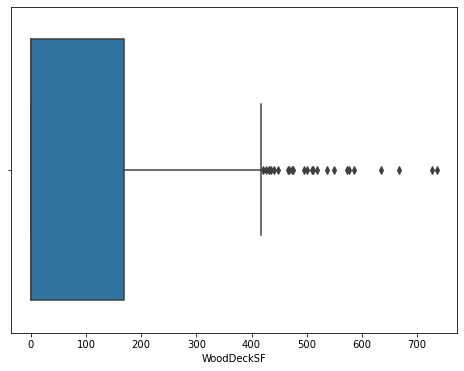

In [1960]:
#WoodDeckSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['WoodDeckSF'])
plt.show()

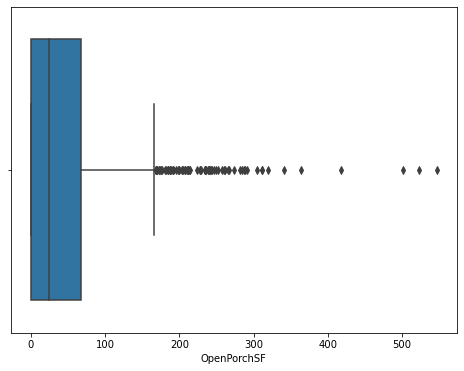

In [1961]:
#OpenPorchSF

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['OpenPorchSF'])
plt.show()

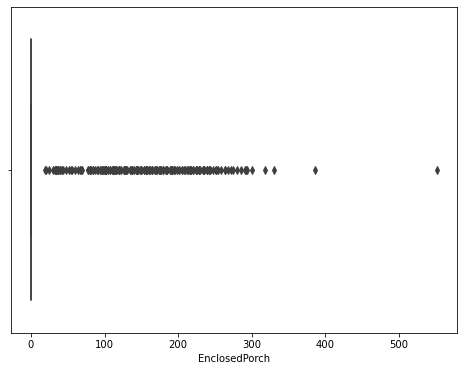

In [1962]:
#EnclosedPorch

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['EnclosedPorch'])
plt.show()

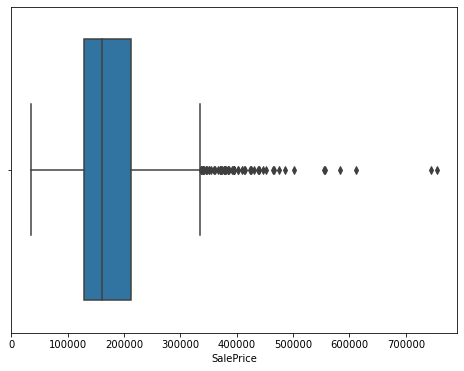

In [1963]:
#SalePrice

plt.figure(figsize=(8, 6))
sns.boxplot(Housing['SalePrice'])
plt.show()

## Data Cleaning

In [1964]:
#dropping Id since irrelevant
Housing=Housing.drop(columns='Id',axis=1)

In [1965]:
# Count the number of NaN values in each column
null_counts = Housing.isnull().sum()

# Display the number of missing values for only those columns that have at least one NaN value
print(null_counts[null_counts > 0])

LotFrontage      248
Alley           1343
MasVnrType         7
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      687
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1427
Fence           1153
MiscFeature     1381
dtype: int64


In [1966]:
# Dropping the rows of the columns with low number of NaN values

# Set the threshold for the minimum number of missing values
threshold = 10

# Drop the columns with less than the threshold number of missing values
Housing = Housing.dropna(subset=null_counts[null_counts < threshold].index)


In [1967]:
# Count the number of NaN values in each column
null_counts = Housing.isnull().sum()

# Display the number of missing values for only those columns that have at least one NaN value
null_col=null_counts[null_counts > 0]
print(null_col)

LotFrontage      247
Alley           1336
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      682
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1419
Fence           1145
MiscFeature     1373
dtype: int64


In [1968]:
#Dropping columns with higher number of NaN values since imputing these will result in bias

null_value_perc = Housing.isnull().sum() / Housing.shape[0]

#columns to drop
columns_to_drop = null_value_perc[null_value_perc > 0.5].index

# Drop the columns with more than the threshold number of missing values
Housing = Housing.drop(columns_to_drop,axis=1)

In [1969]:
#dropping MiscVal since MiscFeature was dropped as well

Housing = Housing.drop(columns='MiscVal',axis=1)

In [1970]:
# Count the number of NaN values in each column
null_counts = Housing.isnull().sum()

# Display the number of missing values for only those columns that have at least one NaN value
null_col=null_counts[null_counts > 0]
print(null_col)

LotFrontage     247
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
FireplaceQu     682
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [1971]:
#Starting with LotFrontage for imputation

Housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      56
75.0      51
        ... 
111.0      1
137.0      1
140.0      1
33.0       1
46.0       1
Name: LotFrontage, Length: 107, dtype: int64

In [1972]:
#statistical summary for LotFrontage

Housing.LotFrontage.describe()

count    1178.000000
mean       69.413413
std        21.929827
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

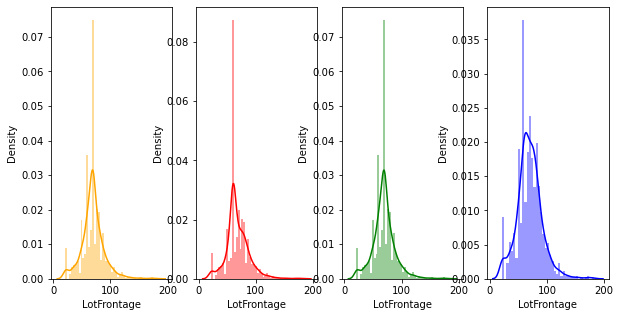

In [1973]:
# Impute the missing values with the mean, median, and mode

mean_imputed = Housing['LotFrontage'].fillna(Housing['LotFrontage'].mean())
median_imputed = Housing['LotFrontage'].fillna(Housing['LotFrontage'].median())
mode_imputed = Housing['LotFrontage'].fillna(Housing['LotFrontage'].mode()[0])

# Compare the results
figure, axes = plt.subplots(1, 4, sharex=True,
                            figsize=(10, 5))
sns.distplot(median_imputed,color='orange',ax=axes[0])
sns.distplot(mode_imputed,color='red',ax=axes[1])
sns.distplot(mean_imputed,color='green',ax=axes[2])
sns.distplot(Housing.LotFrontage,color='blue',ax=axes[3])

In [1974]:
#Since imputing with any of the mean, median and mode doesn't affect the original distribution much,
#imputing Lotfrontage with median

median_value=Housing['LotFrontage'].median()
Housing['LotFrontage'].fillna(median_value,inplace=True)

In [1975]:
# Count the number of NaN values in each column
null_counts = Housing.isnull().sum()

# Display the number of missing values for only those columns that have at least one NaN value
null_col=null_counts[null_counts > 0]
print(null_col)

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
FireplaceQu     682
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [1976]:
# Cases when the house doesn't have the garrage so replacing null with No Garrage

Housing['GarageYrBlt'] = Housing['GarageYrBlt'].replace(np.nan, 'No Garage')
Housing['GarageType'] = Housing['GarageType'].replace(np.nan, 'No Garage')
Housing['GarageFinish'] = Housing['GarageFinish'].replace(np.nan, 'No Garage')
Housing['GarageCond'] = Housing['GarageCond'].replace(np.nan, 'No Garage')
Housing['GarageQual'] = Housing['GarageQual'].replace(np.nan, 'No Garage')

In [1977]:
# Cases when the house doesn't have the basement so replacing null with No Basement

Housing['BsmtExposure'] = Housing['BsmtExposure'].replace(np.nan, 'No Basement')
Housing['BsmtFinType2'] = Housing['BsmtFinType2'].replace(np.nan, 'No Basement')
Housing['BsmtFinType1'] = Housing['BsmtFinType1'].replace(np.nan, 'No Basement')
Housing['BsmtCond'] = Housing['BsmtCond'].replace(np.nan, 'No Basement')
Housing['BsmtQual'] = Housing['BsmtQual'].replace(np.nan, 'No Basement')

In [1978]:
# Cases when house doesn't have Fireplace so replacing null with No Fireplace
Housing['FireplaceQu'] = Housing['FireplaceQu'].replace(np.nan, 'No Fireplace')

In [1979]:
# Count the number of NaN values in each column
null_counts = Housing.isnull().sum()

# Display the number of missing values for only those columns that have at least one NaN value
null_col=null_counts[null_counts > 0]
print(null_col)

Series([], dtype: int64)


In [1980]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1425 non-null   object 
 1   MSZoning       1425 non-null   object 
 2   LotFrontage    1425 non-null   float64
 3   LotArea        1425 non-null   int64  
 4   Street         1425 non-null   object 
 5   LotShape       1425 non-null   object 
 6   LandContour    1425 non-null   object 
 7   Utilities      1425 non-null   object 
 8   LotConfig      1425 non-null   object 
 9   LandSlope      1425 non-null   object 
 10  Neighborhood   1425 non-null   object 
 11  Condition1     1425 non-null   object 
 12  Condition2     1425 non-null   object 
 13  BldgType       1425 non-null   object 
 14  HouseStyle     1425 non-null   object 
 15  OverallQual    1425 non-null   object 
 16  OverallCond    1425 non-null   object 
 17  YearBuilt      1425 non-null   object 
 18  YearRemo

In [1981]:
# Applying binary mapping to columns with two category
Housing['Street'] = Housing['Street'].apply(lambda x:1 if x=='Pave' else 0)
Housing['CentralAir'] = Housing['CentralAir'].apply(lambda x:1 if x=='Y' else 0)

### EDA

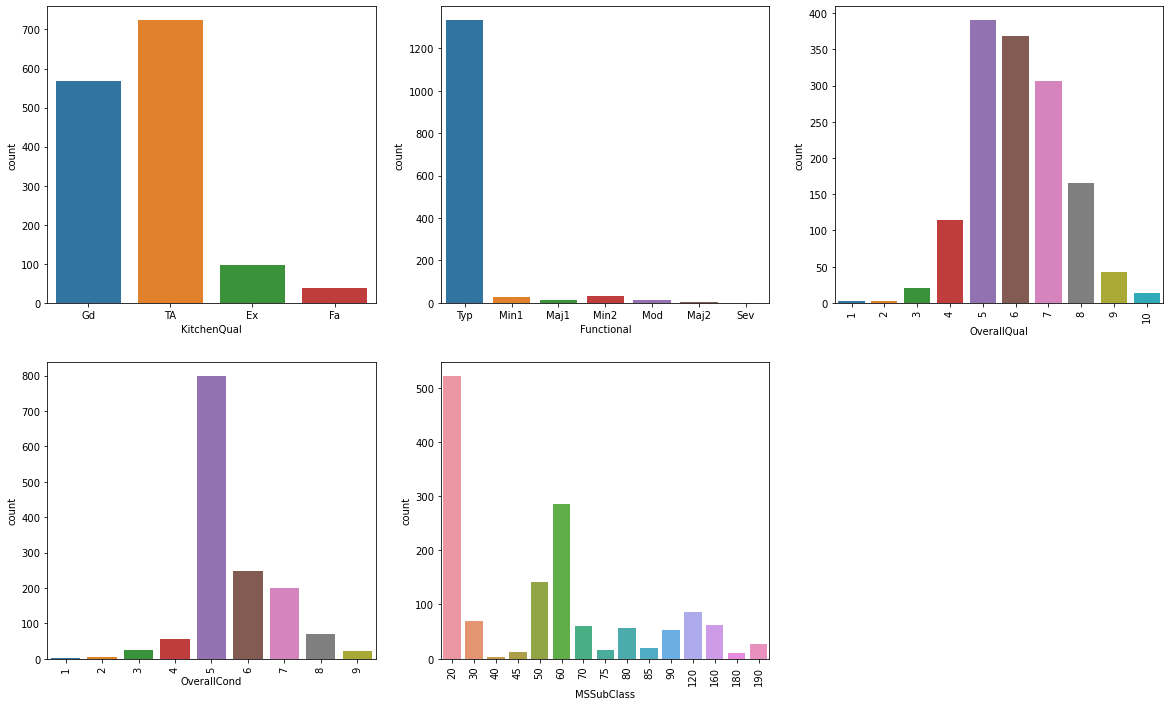

In [1982]:
# visualizing categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = Housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = Housing)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = Housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = Housing)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = Housing)
plt.xticks(rotation=90)


plt.show()

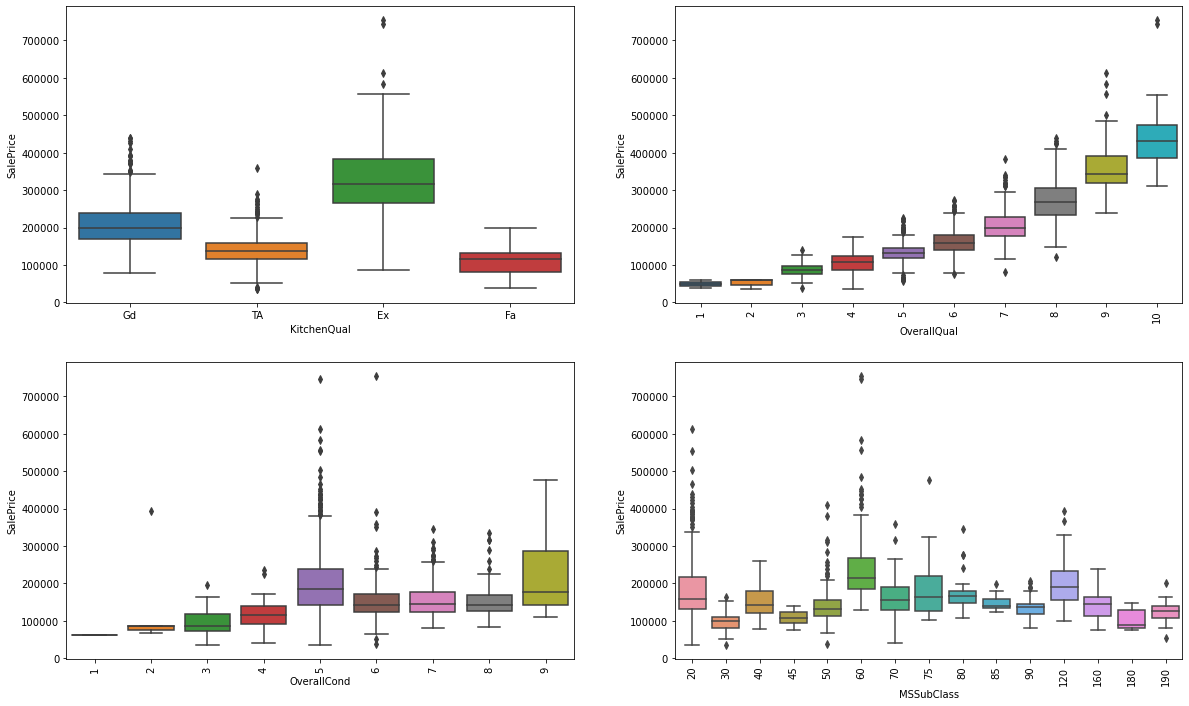

In [1983]:
# visulaizing them with SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = Housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = Housing)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = Housing)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = Housing)
plt.xticks(rotation=90)

plt.show()

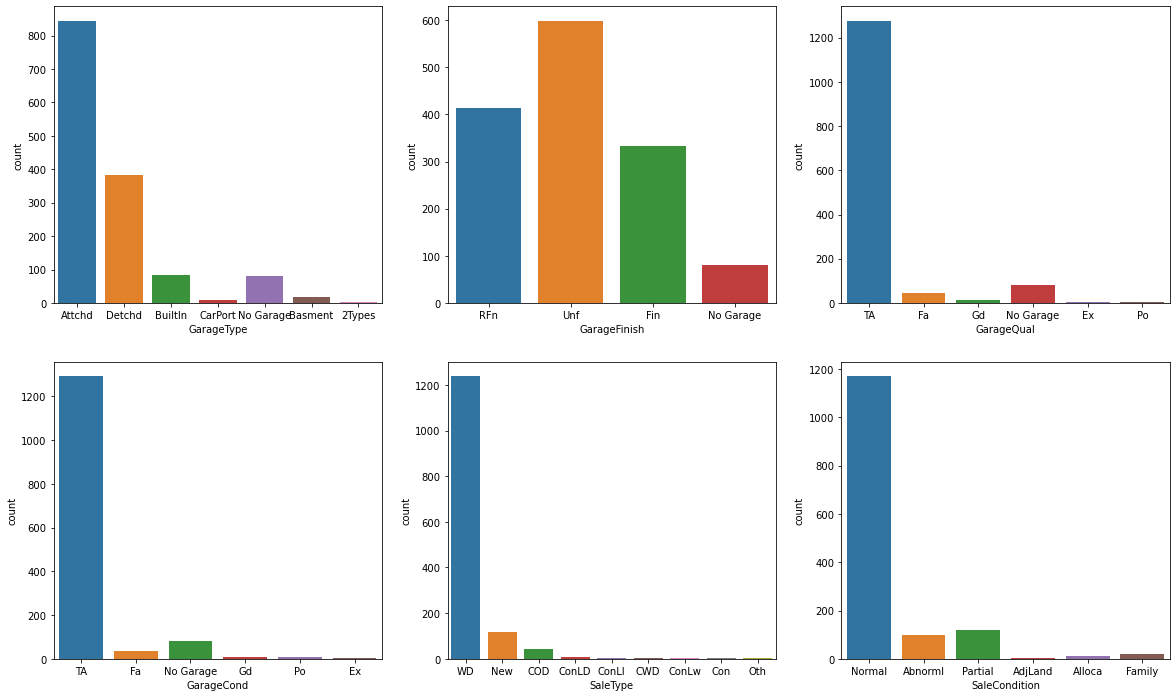

In [1987]:
# visualizing categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = Housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = Housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = Housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = Housing)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = Housing)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = Housing)
plt.show()

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

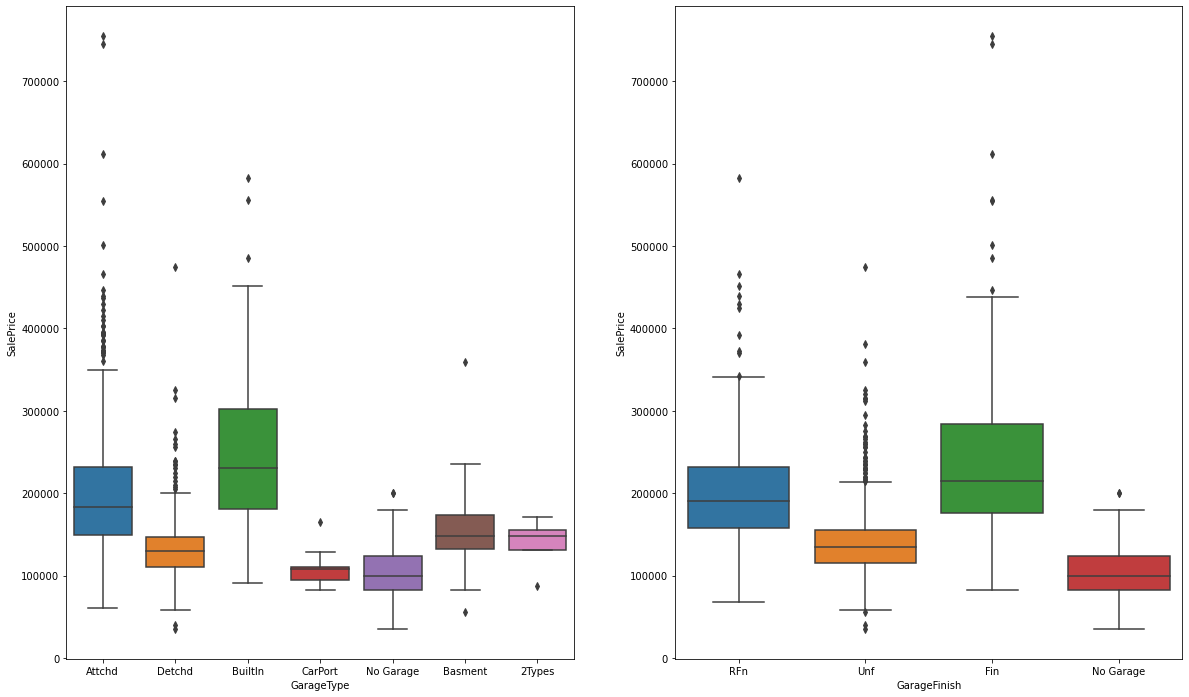

In [1989]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = Housing)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = Housing)

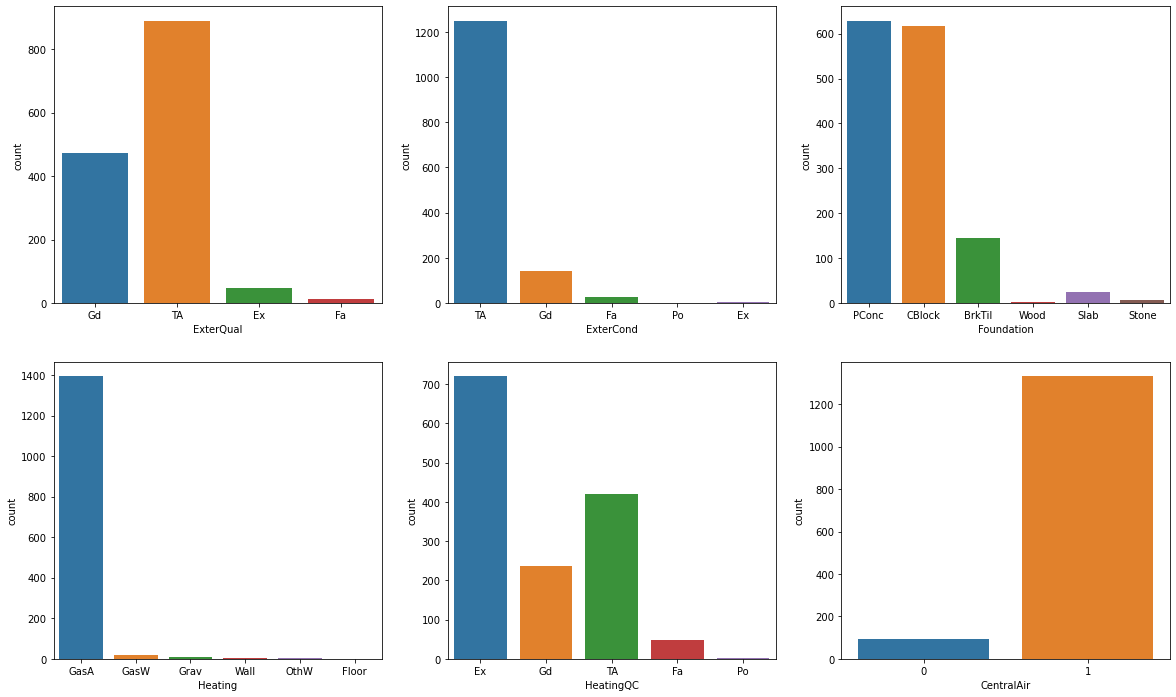

In [1990]:
#plotting categorical variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = Housing)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = Housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = Housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = Housing)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = Housing)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = Housing)
plt.show()

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

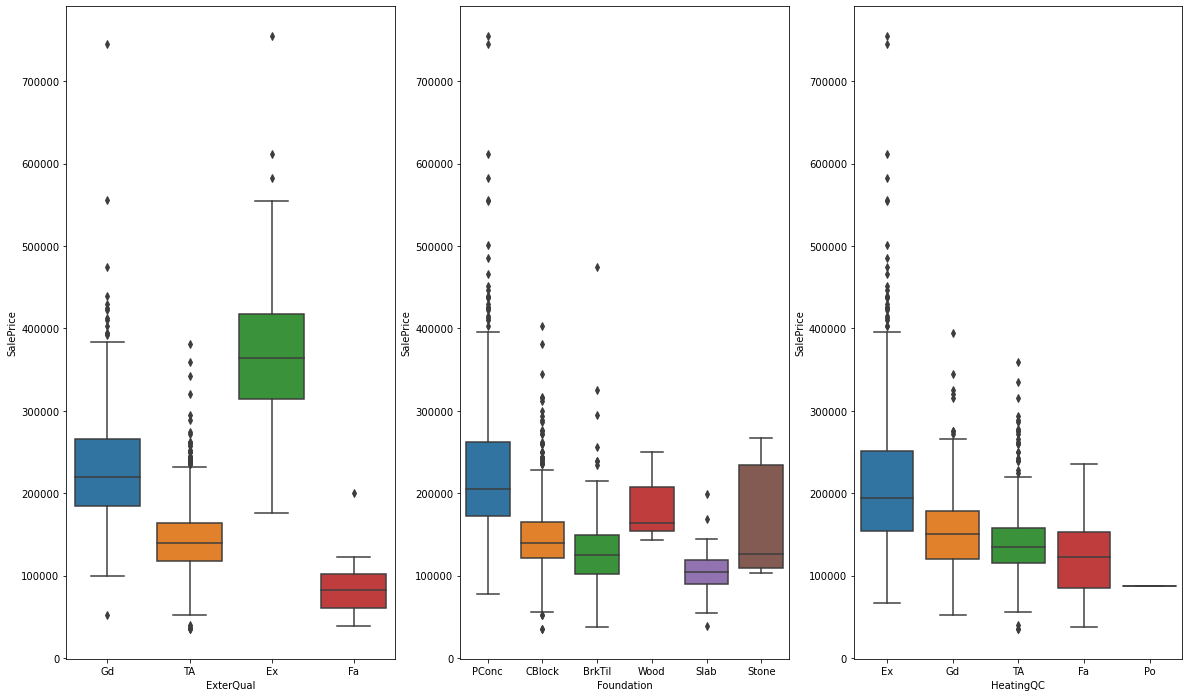

In [1991]:
#Let's see effect of ExterQual and Foundation on HeatingQC

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = Housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = Housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = Housing)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

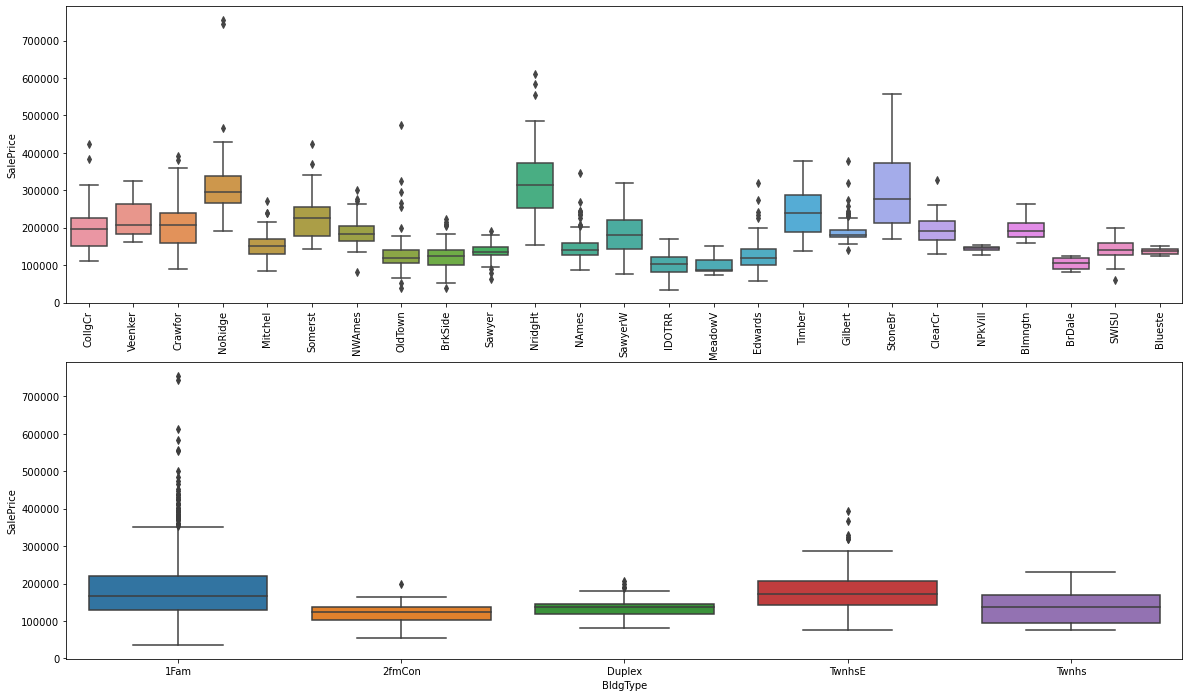

In [1993]:
# Neighbourhood and BldgType with SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = Housing)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = Housing)

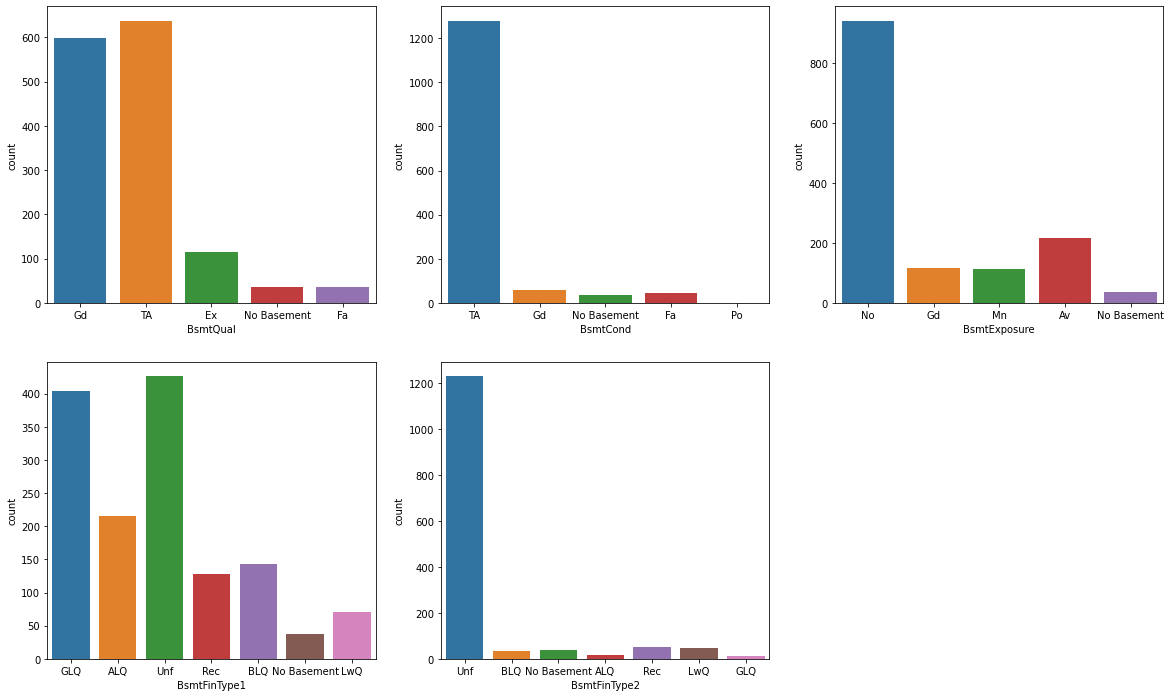

In [1994]:
#Visualizing basement features

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = Housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = Housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = Housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = Housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = Housing)

plt.show()

## Data Preparation

In [1872]:
# split into X and y

y=Housing.pop('SalePrice')
X=Housing

In [1873]:
X.shape

(1425, 74)

In [1874]:
y.shape

(1425,)

In [1875]:
# creating dummy variables for categorical variables

# subset all categorical variables
Housing_categorical = X.select_dtypes(include=['object'])
Housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2003.0,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1976.0,RFn,2,TA,TA,Y,5,2007,WD,Normal
2,60,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2001.0,RFn,2,TA,TA,Y,9,2008,WD,Normal
3,70,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1998.0,Unf,3,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2000.0,RFn,3,TA,TA,Y,12,2008,WD,Normal


In [1876]:
# convert into dummies - one hot encoding

Housing_dummies = pd.get_dummies(Housing_categorical, drop_first=True)
Housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1877]:
# drop categorical variables 

X = X.drop(list(Housing_categorical.columns), axis=1)

In [1878]:
# concat dummy variables with X

X = pd.concat([X, Housing_dummies], axis=1)

In [1879]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [1880]:
# scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = X.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
X_train.columns = cols
X_test.columns = cols
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [1881]:
print(X_train.shape)
print(X_test.shape)

(997, 577)
(428, 577)


In [1882]:
print(y_train.shape)
print(y_test.shape)

(997, 1)
(428, 1)


## Model Building and Model Evaluation

#### Linear Regression

In [1883]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1884]:
from sklearn.metrics import r2_score, mean_squared_error

In [1885]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:{}".format(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:{}".format(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr:{}".format(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr:{}".format(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:{}".format(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:{}".format(mse_test_lr))
metric.append(mse_test_lr**0.5)

r2_train_lr:0.9724076258742582
r2_test_lr:-5.095174386136369e+19
rss1_lr:165932590117.0
rss2_lr:1.3077349589946866e+32
mse_train_lr:166431885.77432296
mse_test_lr:3.0554555116698286e+29


#### Residual Analysis

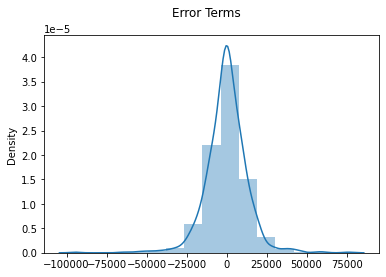

In [1886]:
# plotting histogram for error terms

fig=plt.figure()
res=y_train-y_pred_train
sns.distplot(res,bins=15)
fig.suptitle('Error Terms')
plt.show()

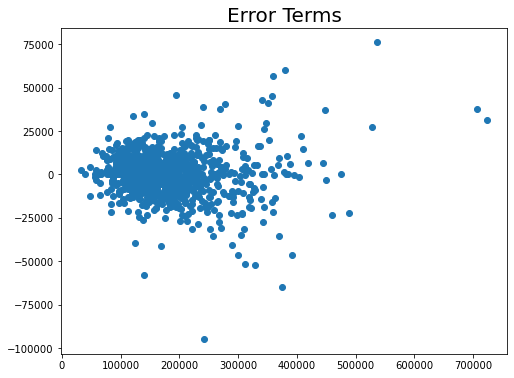

In [1887]:
#plotting scatter plot for error terms

plt.figure(figsize=(8,6))
plt.scatter(y_pred_train,res)
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.show()

<Figure size 1296x1440 with 0 Axes>

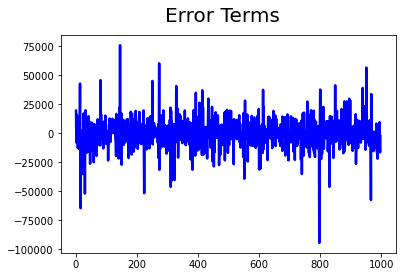

In [1888]:
# plotting lineplot for error terms

plt.figure(figsize=(18, 20))
c = [i for i in range(1,998,1)]
fig = plt.figure()
plt.plot(c,res, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.show()

### As can be seen, the model is overfitting with the presence of large number of features and multicollinearity. We will us Ridge and Lasso to resolve these issues.

### Ridge Regression

In [1889]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1890]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065411,0.079884,0.006320,0.006167,0.0001,{'alpha': 0.0001},-27255.063987,-32973.155077,-34583.139219,-31355.251356,...,-31543.632219,2437.601524,28,-7362.136401,-7294.240857,-7606.728600,-7635.039136,-7163.595949,-7412.348189,182.056719
1,0.034370,0.006251,0.002603,0.003188,0.001,{'alpha': 0.001},-26968.194518,-32468.799886,-33952.660862,-30828.553870,...,-31007.225000,2332.094429,27,-7366.504964,-7297.882455,-7603.019433,-7636.773516,-7169.267841,-7414.689642,179.436284
2,0.032646,0.004155,0.004024,0.004928,0.01,{'alpha': 0.01},-25027.855178,-28922.459331,-29785.504579,-28216.378819,...,-28061.753318,1614.155898,25,-7399.948080,-7352.235086,-7636.986264,-7688.404553,-7254.428959,-7466.400588,167.789691
3,0.029208,0.003564,0.008259,0.007044,0.05,{'alpha': 0.05},-21616.104702,-23562.018628,-23649.625531,-24640.873025,...,-23778.118012,1279.382694,23,-7597.652893,-7593.968287,-7868.252850,-7900.304719,-7454.511942,-7682.938138,172.602148
4,0.032548,0.008812,0.011471,0.004476,0.1,{'alpha': 0.1},-20041.100248,-21302.952171,-21382.380576,-22832.426292,...,-21905.168618,1358.058285,22,-7756.973039,-7801.486121,-8117.672427,-8113.989786,-7612.648056,-7880.553886,201.997521


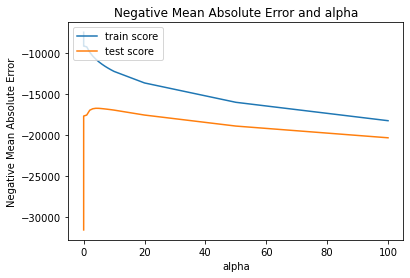

In [1891]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1892]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 1.21570485e+04  1.70966384e+04  5.32874191e+03  1.98889025e+04
   4.04897098e+04  5.06018535e+03  9.93363423e+03  3.60717427e+04
   7.94746217e+03  3.84396447e+04  2.68796887e+04  2.16591648e+03
   4.05576517e+04  8.29277073e+03  9.12442380e+03  7.84192862e+03
  -2.24500566e+03  4.17903079e+03  1.41164057e+04  1.47058603e+04
  -6.52862054e+03  1.23109281e+03  1.13299107e+03 -7.17850807e+02
   4.19151000e+03  3.17834344e+03 -3.58406135e+02 -1.50297128e+03
  -2.34278365e+03 -2.29333096e+03 -3.88240167e+03 -5.45391113e+03
  -9.93094720e+02 -1.31061043e+03  5.33360209e+03  2.15000222e+03
   5.71644041e+03  5.99752309e+02  2.47563066e+03  1.91610591e+03
  -1.74138198e+03  3.84792940e+03 -5.26627174e+03  3.73748224e+03
  -1.11409089e+03  2.70387165e+03 -5.55226000e+03 -2.63316571e+03
  -2.87472351e+03  5.81409781e+03 -5.81689761e+03  3.58197233e+02
  -1.72573269e+02  1.22214629e+03  1.72538463e+03 -4.02075842e+03
   1.20389206e+04 -7.62592592e+03 -4.80972118e+03 -6.37985554e+03
  -5.56056

In [1893]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:{}".format(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:{}".format(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr:{}".format(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr:{}".format(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:{}".format(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:{}".format(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_train_lr:0.9434806058293527
r2_test_lr:0.8816853572738632
rss1_lr:339891356352.3254
rss2_lr:303668103833.5602
mse_train_lr:340914098.6482702
mse_test_lr:709504915.4989724


#### Residual Analysis

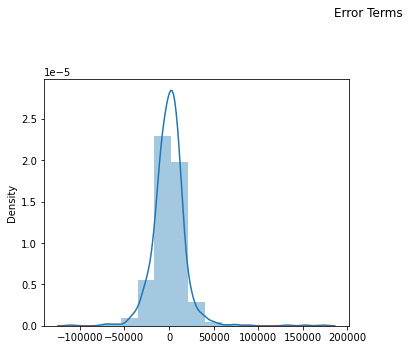

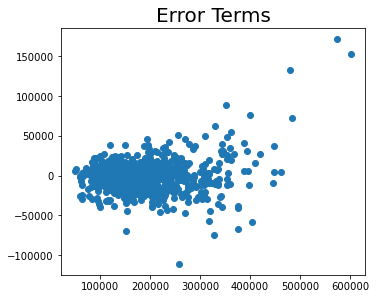

<Figure size 1296x1440 with 0 Axes>

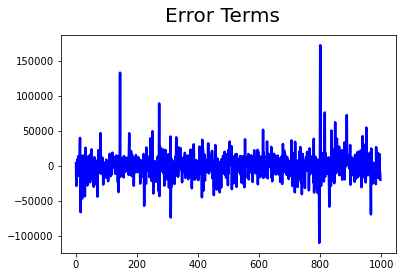

In [1894]:

# plotting histogram for error terms

fig=plt.figure(figsize=(12,10))
plt.subplot(221)
res=y_train-y_pred_train
sns.distplot(res,bins=15)
fig.suptitle('Error Terms')
plt.show()

#plotting scatter plot for error terms

plt.figure(figsize=(12,10))
plt.subplot(222)
plt.scatter(y_pred_train,res)
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.show()

# plotting lineplot for error terms

plt.figure(figsize=(18, 20))

c = [i for i in range(1,998,1)]
fig = plt.figure()
plt.plot(c,res, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.show()

In [1895]:
# Getting top 5 features for ridge

coefficients = np.array(ridge.coef_).reshape(-1,1)
feature_names = list(X.columns)

ridge_coef = pd.DataFrame(data=coefficients, index=feature_names)
ridge_coef.columns=['coefficients']
ridge_coef.sort_values(by='coefficients', ascending=False, inplace=True)
ridge_coef.head()

,coefficients
GrLivArea,40557.651674
BsmtFinSF1,40489.709840
OverallQual_10,38651.518765
1stFlrSF,38439.644705
TotalBsmtSF,36071.742740


### Lasso

In [1896]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1897]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.490069,0.087971,0.006655,0.007363,0.0001,{'alpha': 0.0001},-26665.376641,-32563.302291,-34269.072640,-29932.317549,...,-30745.966203,2577.879866,28,-7384.377414,-7329.634205,-7611.027116,-7668.875946,-7187.338028,-7436.250542,179.263345
1,0.422331,0.034912,0.006242,0.007645,0.001,{'alpha': 0.001},-26663.648010,-32537.150841,-34267.132990,-29921.826808,...,-30731.689295,2575.975971,27,-7384.380151,-7329.581319,-7610.859680,-7668.883779,-7187.366415,-7436.214269,179.230989
2,0.379984,0.027290,0.009368,0.007649,0.01,{'alpha': 0.01},-26639.074840,-32274.698779,-34282.182625,-29814.082489,...,-30621.167382,2565.995266,26,-7384.789243,-7329.444328,-7609.858202,-7669.336518,-7188.096959,-7436.305050,178.943963
3,0.385173,0.008500,0.000403,0.000805,0.05,{'alpha': 0.05},-26490.212397,-31649.635742,-33977.876755,-29473.695289,...,-30257.131741,2486.093870,25,-7387.703045,-7330.458947,-7608.427240,-7672.133358,-7193.396532,-7438.423824,177.644979
4,0.517695,0.028104,0.006248,0.007653,0.1,{'alpha': 0.1},-26204.172322,-31516.486037,-33509.957858,-29242.109413,...,-29983.343371,2445.812687,24,-7391.554244,-7333.520285,-7608.920700,-7675.422143,-7200.364355,-7441.956345,176.095892


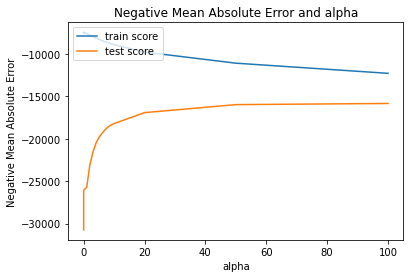

In [1898]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1899]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1900]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [1901]:
lasso.coef_

array([ 8.07006213e+03,  1.14348747e+04,  0.00000000e+00,  2.11429683e+04,
        5.01590780e+04,  0.00000000e+00,  0.00000000e+00,  6.47201338e+04,
        4.86708503e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.06181854e+05,  0.00000000e+00,  2.00246900e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.24030805e+04,  1.59206758e+04,
       -1.84300408e+03,  0.00000000e+00,  0.00000000e+00, -2.59262639e+03,
        5.02578839e+03,  0.00000000e+00, -2.51114200e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.51860428e+03,
       -0.00000000e+00, -0.00000000e+00,  3.73318927e+03,  0.00000000e+00,
        7.07264803e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.43174693e+03,  4.61622798e+02, -0.00000000e+00,  1.80742720e+03,
       -0.00000000e+00,  4.05800033e+03, -6.56378347e+02, -0.00000000e+00,
       -1.38075011e+03,  1.98039695e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [1902]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:{}".format(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:{}".format(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr:{}".format(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr:{}".format(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:{}".format(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:{}".format(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_train_lr:0.9450581454255303
r2_test_lr:0.8872150095002878
rss1_lr:1.1425823623428294e+16
rss2_lr:2019368996788178.8
mse_train_lr:331398683.676038
mse_test_lr:676344899.5850555


In [1903]:
# Getting top 5 features for lasso

coefficients = np.array(lasso.coef_).reshape(-1,1)
feature_names = list(X.columns)

ridge_coef = pd.DataFrame(data=coefficients, index=feature_names)
ridge_coef.columns=['coefficients']
ridge_coef.sort_values(by='coefficients', ascending=False, inplace=True)
ridge_coef.head()

,coefficients
GrLivArea,206181.853695
OverallQual_10,91672.519371
TotalBsmtSF,64720.133787
BsmtFinSF1,50159.077968
OverallQual_9,48370.807578


In [1904]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.724076e-01,9.434806e-01,9.450581e-01
1,R2 Score (Test),-5.095174e+19,8.816854e-01,8.872150e-01
2,RSS (Train),1.659326e+11,3.398914e+11,1.142582e+16
3,RSS (Test),1.307735e+32,3.036681e+11,2.019369e+15
4,RMSE (Train),1.290085e+04,1.846386e+04,1.820436e+04
5,RMSE (Test),5.527617e+14,2.663653e+04,2.600663e+04


### Doubling the alpha for ridge and lasso

In [1905]:
#Fitting Ridge model for alpha = 20 (10*2) and printing coefficients which have been penalised
alpha = 20
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)
print(ridge_double.coef_)

[[ 1.11604248e+04  1.57322371e+04  3.94763352e+03  1.57698551e+04
   3.15024022e+04  3.43680959e+03  8.56452665e+03  2.84516246e+04
   7.82888646e+03  2.97951883e+04  1.92856679e+04  2.52065008e+03
   3.07807801e+04  9.14566648e+03  8.54489519e+03  7.31904879e+03
  -1.44309436e+03  2.36508223e+03  1.08687666e+04  9.65716133e+03
  -7.05371556e+03  7.19192014e+02  7.66030499e+02  5.33372048e+02
   3.70083360e+03  3.84840930e+03  4.37782780e+02 -1.32035154e+03
  -1.98180073e+03 -1.95767115e+03 -3.69185680e+03 -4.98688959e+03
  -1.59109420e+03 -1.30423245e+03  3.65117114e+03  1.42091744e+03
   4.89454998e+03 -1.15409762e+03  2.63039548e+03  9.67140909e+02
  -2.70755933e+03  2.90226996e+03 -3.84585510e+03  3.63500783e+03
  -6.56576260e+02  1.73541533e+03 -4.77975630e+03 -1.73785464e+03
  -3.08141504e+03  4.80892682e+03 -4.14851410e+03  1.63523965e+02
  -3.82379509e+01  1.66106187e+03  1.41993627e+03 -3.59667211e+03
   1.01047627e+04 -7.34283161e+03 -5.84454210e+03 -5.32790535e+03
  -4.89068

In [1906]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:{}".format(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:{}".format(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr:{}".format(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr:{}".format(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:{}".format(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:{}".format(mse_test_lr))
metric2.append(mse_test_lr**0.5)

r2_train_lr:0.9284020319608098
r2_test_lr:0.8733333600411981
rss1_lr:430569556273.6436
rss2_lr:325104462887.92676
mse_train_lr:431865151.7288301
mse_test_lr:759589866.5605766


In [1907]:
# Getting top 5 features for ridge_double

coefficients = np.array(ridge_double.coef_).reshape(-1,1)
feature_names = list(X.columns)

ridge_double_coef = pd.DataFrame(data=coefficients, index=feature_names)
ridge_double_coef.columns=['coefficients']
ridge_double_coef.sort_values(by='coefficients', ascending=False, inplace=True)
ridge_double_coef.head()

,coefficients
BsmtFinSF1,31502.402159
GrLivArea,30780.780112
1stFlrSF,29795.188347
OverallQual_10,29788.201981
TotalBsmtSF,28451.624625


In [1908]:
#Fitting Lasso model for alpha = 200(100*2) and printing coefficients which have been penalised

alpha =200

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 

Lasso(alpha=200)

In [1909]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:{}".format(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:{}".format(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr:{}".format(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr:{}".format(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:{}".format(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:{}".format(mse_test_lr))
metric3.append(mse_test_lr**0.5)

r2_train_lr:0.9338813118381831
r2_test_lr:0.885340030097789
rss1_lr:1.1218249772277566e+16
rss2_lr:1997774585015942.5
mse_train_lr:398815190.94905955
mse_test_lr:687588707.3833127


In [1910]:
# Getting top 5 features for lasso_double

coefficients = np.array(lasso_double.coef_).reshape(-1,1)
feature_names = list(X.columns)

lasso_double_coef = pd.DataFrame(data=coefficients, index=feature_names)
lasso_double_coef.columns=['coefficients']
lasso_double_coef.sort_values(by='coefficients', ascending=False, inplace=True)
lasso_double_coef.head()

,coefficients
GrLivArea,196460.085332
OverallQual_10,98306.348329
TotalBsmtSF,62523.288634
OverallQual_9,50222.058343
BsmtFinSF1,46831.659212


### creating lasso model excluding 5 most important predictor variable

In [1911]:
# dropping 5 most important predictor var. from train and test set

X_train_new=X_train.drop(columns=['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','BsmtFinSF1'],axis=1)
X_test_new=X_test.drop(columns=['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','BsmtFinSF1'],axis=1)

In [1912]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso_five = Lasso(alpha=alpha)
        
lasso_five.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [1913]:
# Getting top 5 features for lasso_five

coefficients = np.array(lasso_five.coef_).reshape(-1,1)
feature_names = list(X_train_new.columns)

lasso_five_coef = pd.DataFrame(data=coefficients, index=feature_names)
lasso_five_coef.columns=['coefficients']
lasso_five_coef.sort_values(by='coefficients', ascending=False, inplace=True)
lasso_five_coef.head()

,coefficients
1stFlrSF,218925.075964
2ndFlrSF,104121.093602
RoofMatl_WdShngl,69818.835058
PoolArea,51366.646512
MasVnrArea,23941.538988
